# DAPA GROUP 14 PROJECT CODE FILE
### Machine Learning Strategies for Identifying Patterns in Student Dropout and Predicting Academic Success in Higher Education 

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

## DATASET READING

In [2]:
df = pd.read_csv(r'C:\Users\villain\OneDrive\Desktop\Data analytics\Sem 2\Predictive intel\dapa_dataset2.csv')
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
print("-----------Information-----------")
print(df.info())

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother'

In [6]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## DATA PREPROCESSING

In [3]:
total_null_count = df.isnull().sum().sum()
print(f"Total null values in the dataset: {total_null_count}")

Total null values in the dataset: 0


In [5]:
numerical = [var for var in df.columns if df[var].dtype!='O'] 
categorical = [var for var in df.columns if df[var].dtype == 'O']
print("Numerical: ", numerical)
print("Caregorical: ", categorical)

Numerical:  ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Caregorical:  ['Target']


In [7]:
print("----------Missing value-----------")
print(df.isna().sum())
print("----------Null value-----------")
print(df.isnull().sum())

----------Missing value-----------
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                

In [8]:
print(df.nunique())

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

### Encoding the target variable

In [10]:
# Creating a LabelEncoder for target variable
print(f'Target',df.Target.unique())
le = LabelEncoder()
le.fit(df.Target)
# Transforming the categories into numerical values of target variable
df['Target_encoded'] = le.transform(df['Target'])

df

#dropout =0, graduate =2 enrolled =1

Target ['Dropout' 'Graduate' 'Enrolled']


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_encoded
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,2
4420,1,1,2,15,1,1,19,1,1,10,...,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,0
4421,1,1,1,12,1,1,1,22,27,10,...,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,0
4422,1,1,1,9,1,1,1,22,27,8,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,2


In [11]:
#dropping the traget variable
df.drop(columns=['Target'], inplace=True)

In [12]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


## DATA VISUALIZATION

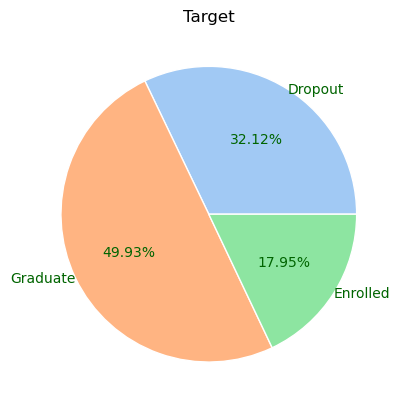

In [9]:
# percentage of different variables in the target variable
num = []
unique_targets = df['Target'].unique()

for t in unique_targets:
    num.append(df['Target'].tolist().count(t))

plt.pie(num, labels=unique_targets, autopct="%.2f%%", labeldistance=1., 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, 
        textprops={'color': 'darkgreen', 'fontsize': 10}, 
        colors=sns.color_palette('pastel'))

plt.title('Target')
plt.show()

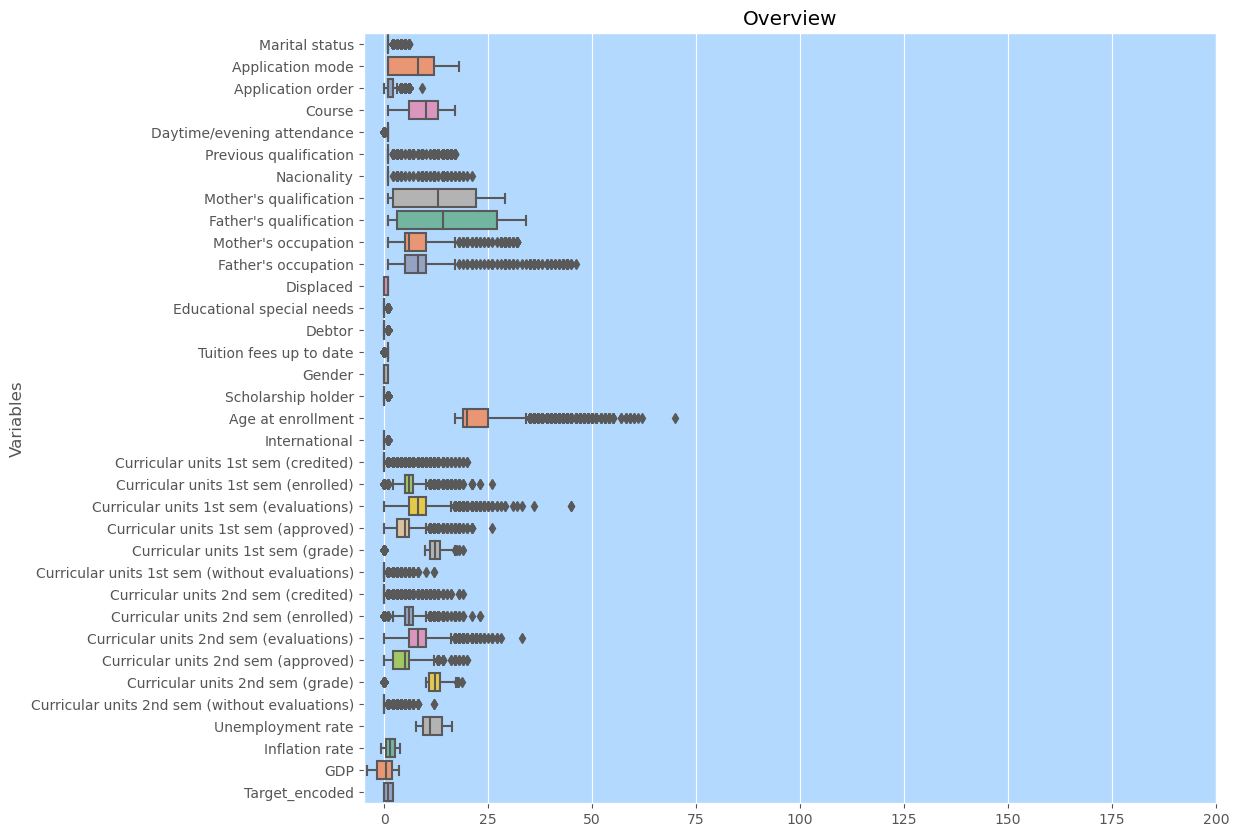

In [13]:
#looking for any outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # using ggplot style

f, ax = plt.subplots(figsize=(11, 10))

ax.set_facecolor('#b3d9ff')
ax.set(xlim=(-5, 200))
plt.ylabel('Variables')
plt.title("Overview")
ax = sns.boxplot(data = df, # creating a box plot
  orient = 'h', 
  palette = 'Set2',)

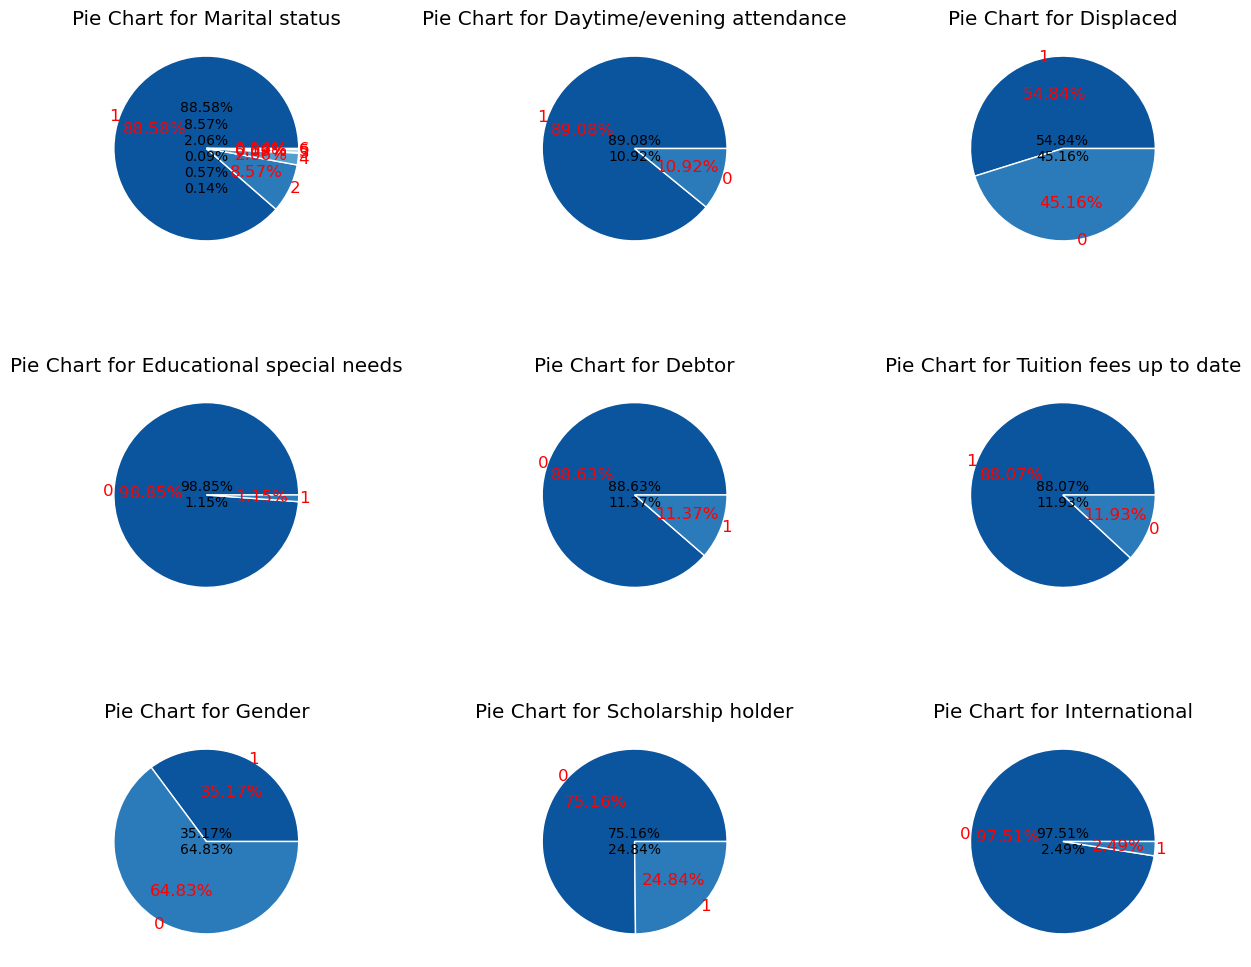

In [14]:

# List of some important features to be visualized
features = ["Marital status", "Daytime/evening attendance", "Displaced", "Educational special needs",
                        "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "International"]

rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

for i, feature in enumerate(features):
    row = i // cols
    col = i % cols

    num = []
    for t in df[feature].unique():
        num.append(df[feature].tolist().count(t))

    axes[row, col].pie(num, labels=df[feature].unique(), autopct="%.2f%%", labeldistance=1.,
                       wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                       textprops={'color': 'red', 'fontsize': 12}, colors=sns.color_palette('Blues_r'))
    axes[row, col].set_title(f"Pie Chart for {feature}")

    # Calculating the percentage of each category
    total = sum(num)
    percentages = [f"{(count / total) * 100:.2f}%" for count in num]

    axes[row, col].text(0.5, 0.5, '\n'.join(percentages), horizontalalignment='center', verticalalignment='center',
                        fontsize=10, transform=axes[row, col].transAxes)

plt.show()


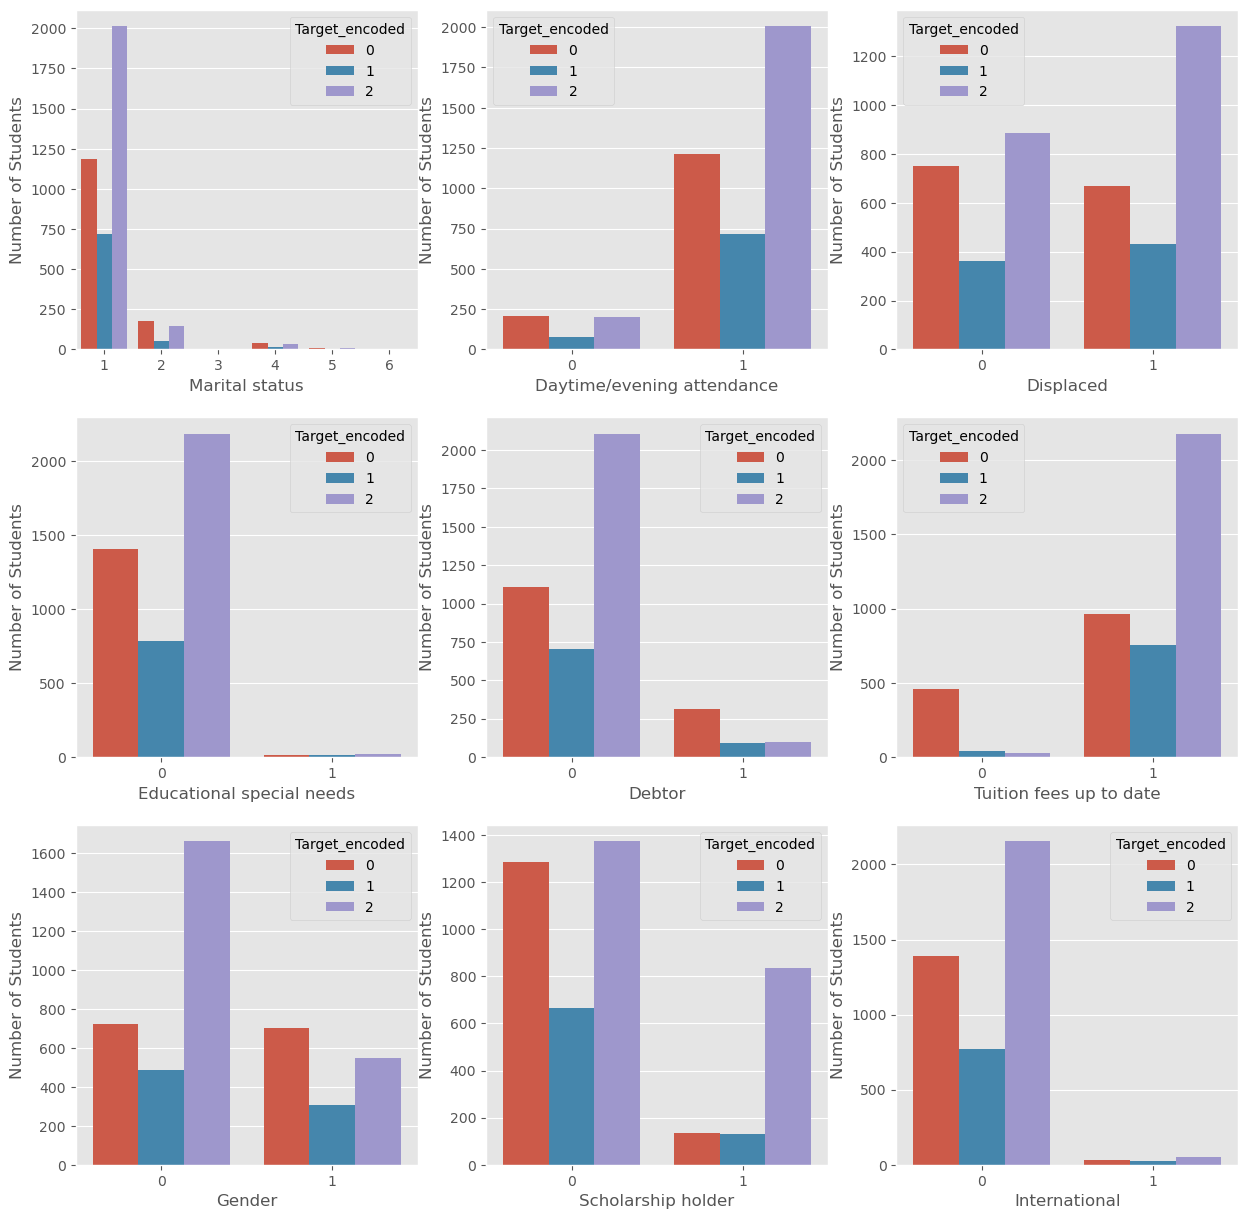

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))
for k in range(len(features)):
    sns.countplot(ax=axes[k//3][k%3], data=df, x=features[k], hue='Target_encoded')
    axes[k//3][k%3].set_ylabel('Number of Students')
plt.tight_layout
plt.show()

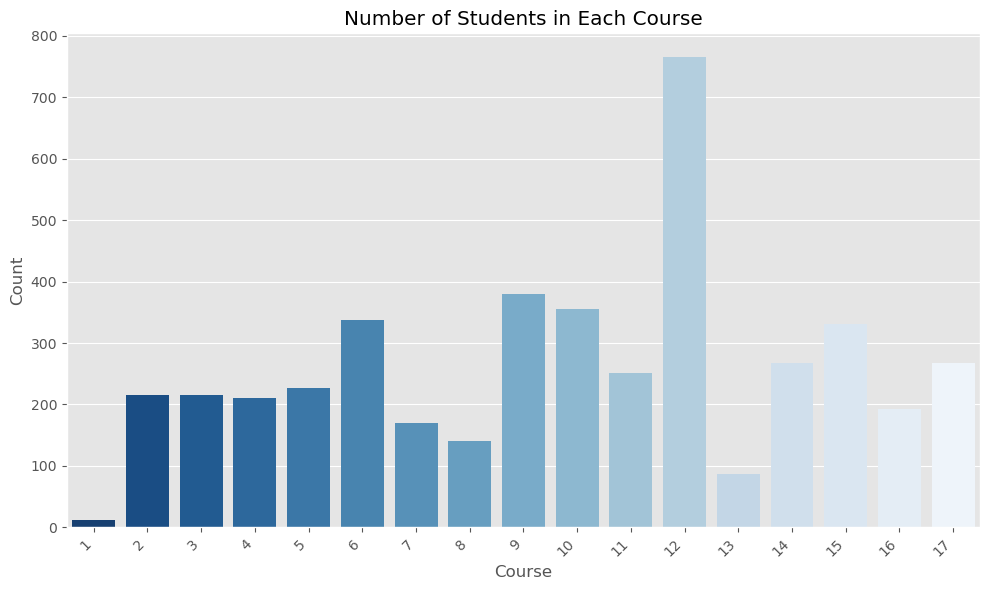

In [16]:
# visualizing for the variable 'course'
course_counts = df["Course"].value_counts()


course_counts = course_counts.sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=course_counts.index, y=course_counts.values, palette="Blues_r")
plt.xlabel("Course")
plt.ylabel("Count")
plt.title("Number of Students in Each Course")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

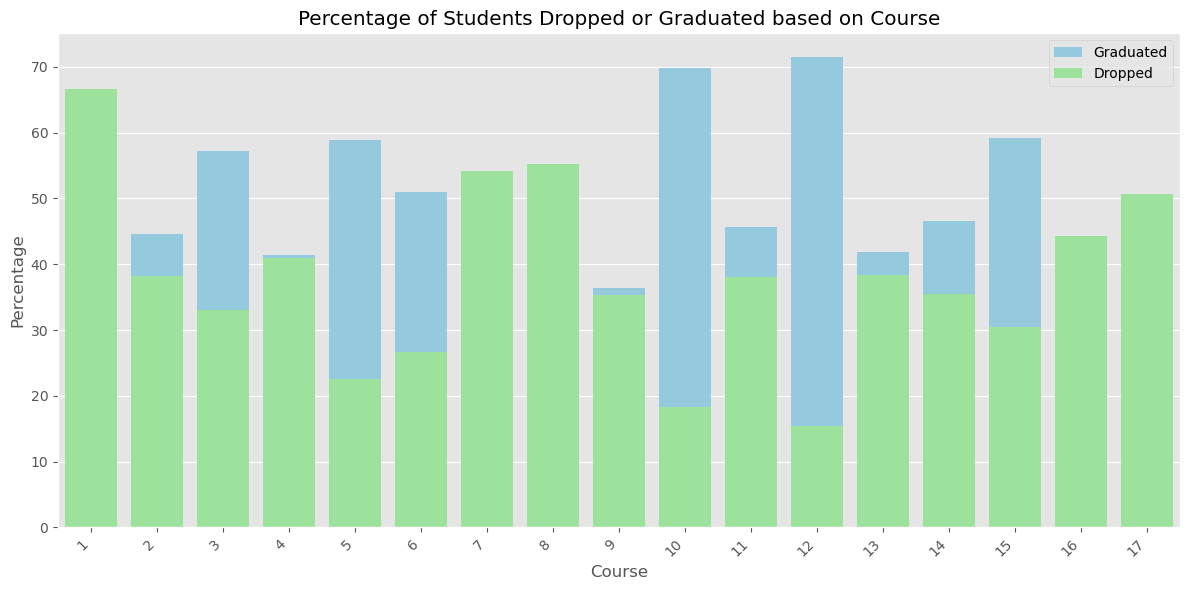

In [17]:
# 'course' variable in respect to 'target_encoded' variable
course_target_counts = df.groupby(["Course", "Target_encoded"]).size().unstack(fill_value=0)

course_total_counts = course_target_counts.sum(axis=1)

course_percentages = course_target_counts.divide(course_total_counts, axis=0) * 100

# Ploting the vertical bar chart to visualize the percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=course_percentages.index, y=course_percentages[2], color="skyblue", label="Graduated", orient="v")
sns.barplot(x=course_percentages.index, y=course_percentages[0], color="lightgreen", label="Dropped", orient="v")
plt.xlabel("Course")
plt.ylabel("Percentage")
plt.title("Percentage of Students Dropped or Graduated based on Course")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()






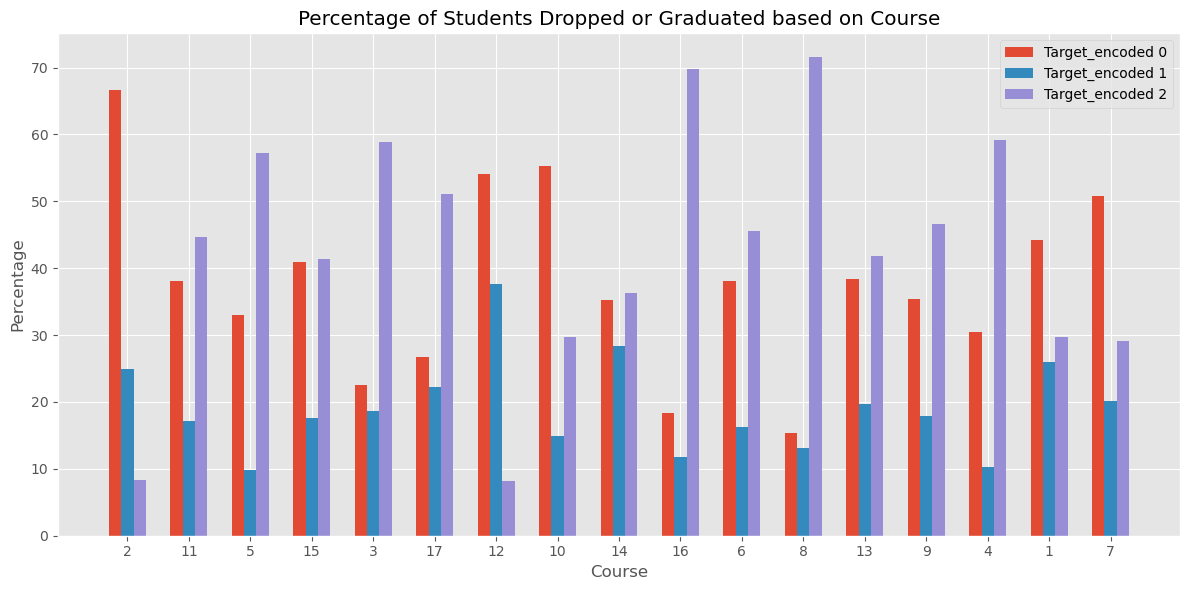

In [18]:

course_target_counts = df.groupby(["Course", "Target_encoded"]).size().unstack(fill_value=0)
course_total_counts = course_target_counts.sum(axis=1)
course_percentages = course_target_counts.divide(course_total_counts, axis=0) * 100
course_categories = df["Course"].unique()
num_target_categories = len(course_target_counts.columns)
bar_width = 0.2
bar_positions = np.arange(len(course_categories))

plt.figure(figsize=(12, 6))
for i in range(num_target_categories):
    plt.bar(bar_positions + i * bar_width, course_percentages[i], width=bar_width, label=f"Target_encoded {i}")

plt.xlabel("Course")
plt.ylabel("Percentage")
plt.title("Percentage of Students Dropped or Graduated based on Course")
plt.xticks(bar_positions + (num_target_categories - 1) * bar_width / 2, course_categories)
plt.legend()
plt.tight_layout()
plt.show()

## MODEL BUILDING 

#### SPlITTING UP OF DATASET FOR MODELLING AND PREDICTING BASED ON THE VALUES OF 'TARGET' VARIABLES

In [21]:
# Spliting the dataset based on the 'Target_encoded' values
df_train = df[df['Target_encoded'].isin([0, 2])]
df_test = df[~df['Target_encoded'].isin([0, 2])]

# Printing the shapes of the resulting dataframes
print("Train dataframe shape:", df_train.shape)
print("Test dataframe shape:", df_test.shape)

Train dataframe shape: (3630, 35)
Test dataframe shape: (794, 35)


In [22]:

print(f'Target_encoded',df_train.Target_encoded.unique())
print(f'Target_encoded',df_test.Target_encoded.unique())

Target_encoded [0 2]
Target_encoded [1]


In [23]:
df_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [24]:
df_test.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
16,1,9,1,10,1,1,1,13,28,6,...,0,6,14,2,11.000,0,10.8,1.4,1.74,1
19,1,1,1,16,1,1,1,13,14,8,...,0,7,8,6,13.500,0,16.2,0.3,-0.92,1
21,1,9,4,13,1,1,1,1,28,5,...,0,8,9,8,11.425,0,12.7,3.7,-1.70,1
25,1,1,1,10,1,1,1,13,28,10,...,0,6,12,4,11.000,0,7.6,2.6,0.32,1
27,1,1,1,6,1,1,1,13,14,4,...,0,5,7,4,13.000,0,9.4,-0.8,-3.12,1


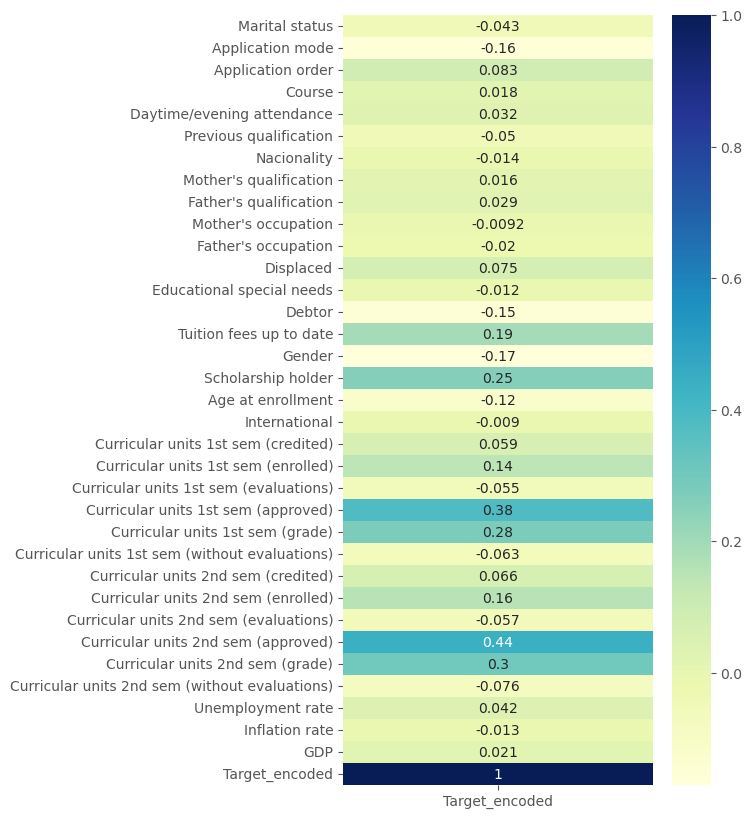

In [25]:
num = df['Target_encoded'].value_counts()

for i in range(len(num.index)):
    df['Target_encoded'] = df['Target_encoded'].replace(num.index[i], num[num.index[i]])

plt.figure(figsize=(5, 10))
sns.heatmap(df.corr()[['Target_encoded']], cmap="YlGnBu", annot=True)
plt.show()

In [39]:
# using only selected features for models with respect to correlation graph
X = df_train[['Marital status','Application order','Course','Daytime/evening attendance','Displaced','Tuition fees up to date', 'Scholarship holder','Curricular units 1st sem (enrolled)','Unemployment rate','GDP','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)']]
y = df_train['Target_encoded']

In [40]:
# Normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
X

array([[-0.30068558,  2.4368225 , -1.82841548, ..., -2.08322431,
        -1.42901395, -1.83108537],
       [-0.30068558, -0.56247077,  0.24526131, ...,  0.68521698,
         0.46855487,  0.66238282],
       [-0.30068558,  2.4368225 , -1.13718988, ..., -2.08322431,
        -1.42901395, -1.83108537],
       ...,
       [-0.30068558, -0.56247077,  0.47566985, ...,  0.86566003,
        -1.11275248,  0.63197467],
       [-0.30068558, -0.56247077, -0.21555575, ...,  0.64566782,
         0.1522934 ,  0.35830134],
       [-0.30068558, -0.56247077,  1.16689545, ...,  0.2238101 ,
         0.46855487,  0.54075023]])

#### SPLITTING OF THE MODEL TRAINING DATA INTO TRAIN AND TEST DATA 

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### MODEL AND ITS RESULT

In [43]:
# Creating the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier to the training data
rfc.fit(x_train, y_train)

# Predicting on the testing data
y_pred = rfc.predict(x_test)

# Evaluating the model's performance
accuracy_rm = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rm)
f1 = f1_score(y_test, y_pred, pos_label=2 )
print("F1 score:", f1)
precision = precision_score(y_test, y_pred, pos_label=2 )
print("precision: ", precision)
recall = recall_score(y_test, y_pred, pos_label=2 )
print("recall: ", recall)

Accuracy: 0.8971533516988063
F1 score: 0.92
precision:  0.8882758620689655
recall:  0.9540740740740741


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.86       414
           2       0.89      0.95      0.92       675

    accuracy                           0.90      1089
   macro avg       0.90      0.88      0.89      1089
weighted avg       0.90      0.90      0.90      1089



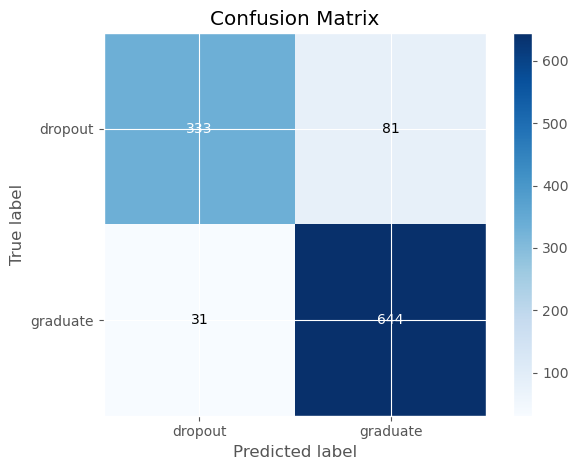

In [45]:
#Printing Confusion Matrix
import numpy as np
class_names = ['dropout', 'graduate']
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

### VERIFING THE MODEL FOR NEW ENROLLED STUDENTS

In [46]:
enrol = df_test.drop('Target_encoded', axis=1)

In [47]:
enrol = df_test[['Marital status','Application order','Course','Daytime/evening attendance','Displaced','Tuition fees up to date', 'Scholarship holder','Curricular units 1st sem (enrolled)','Unemployment rate','GDP','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)']]

In [48]:
enrol_pred = rfc.predict(enrol)

In [49]:
enrol_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,

### ENROLLED STUDENT MODEL RESULTS AND INTERPRETATION

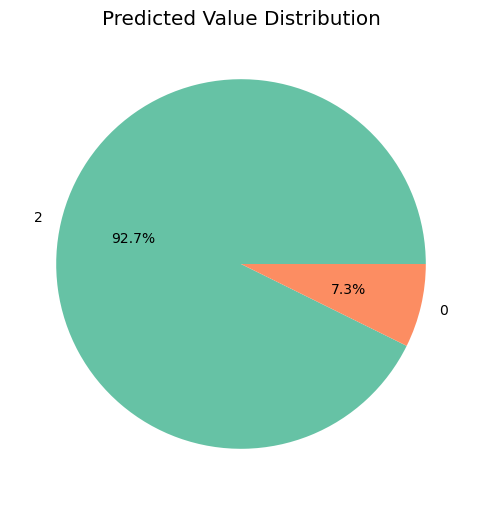

In [87]:
enrol_pred_series = pd.Series(enrol_pred)
value_counts = enrol_pred_series.value_counts()
percentages = (value_counts / len(enrol_pred_series)) * 100
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=value_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title("Predicted Value Distribution")
plt.show()


In [55]:
enrol['Predicted'] = enrol_pred

In [56]:
enrol

,Marital status,Application order,Course,Daytime/evening attendance,Displaced,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (enrolled),Unemployment rate,GDP,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Predicted
16,1,1,10,1,1,1,0,6,10.8,1.74,1,12.000000,2,11.000000,2
19,1,1,16,1,1,1,0,7,16.2,-0.92,6,11.666667,6,13.500000,2
21,1,4,13,1,1,1,0,7,12.7,-1.70,7,11.437500,8,11.425000,2
25,1,1,10,1,1,1,1,6,7.6,0.32,5,11.600000,4,11.000000,2
27,1,1,6,1,1,1,0,5,9.4,-3.12,5,12.666667,4,13.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,1,4,16,1,1,1,0,6,9.4,-3.12,5,12.600000,3,11.666667,2
4402,1,2,16,1,1,1,0,6,10.8,1.74,5,12.600000,6,13.000000,2
4406,1,1,5,1,1,1,0,6,10.8,1.74,4,12.000000,2,11.333333,2
4412,1,1,5,1,1,1,1,6,13.9,0.79,4,13.000000,5,12.200000,2


In [60]:
enrol_features= ['Marital status','Daytime/evening attendance','Tuition fees up to date', 'Scholarship holder']

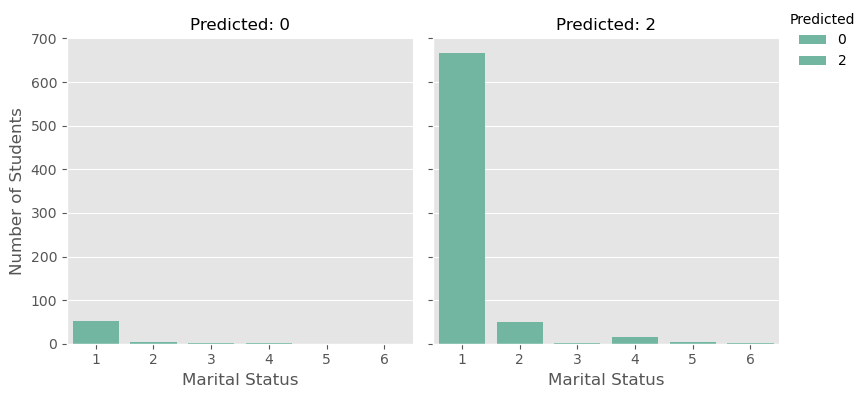

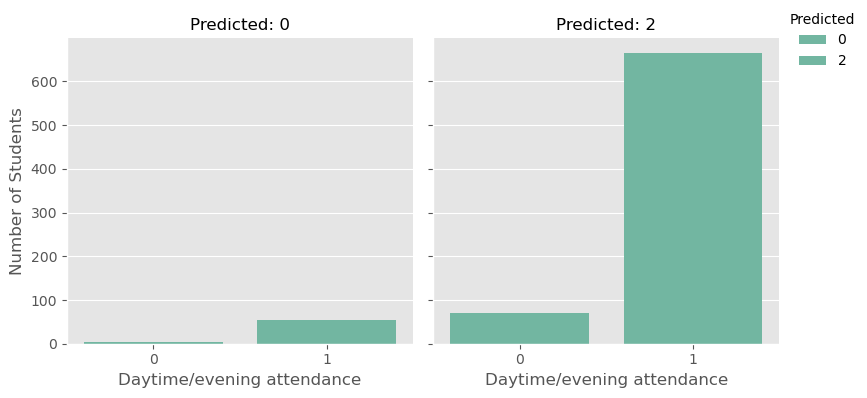

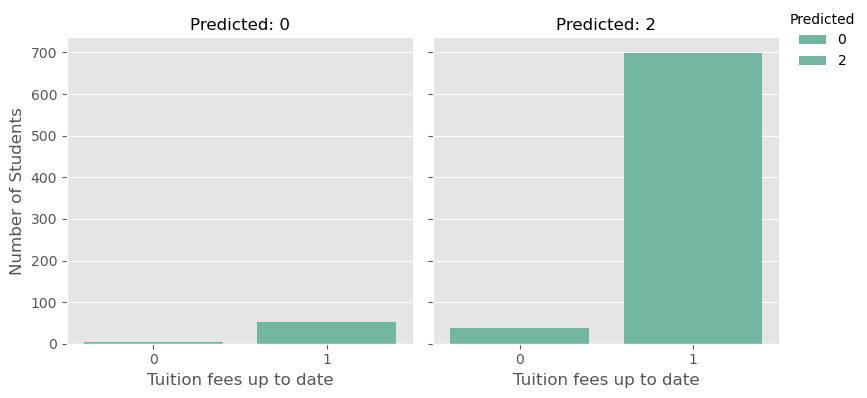

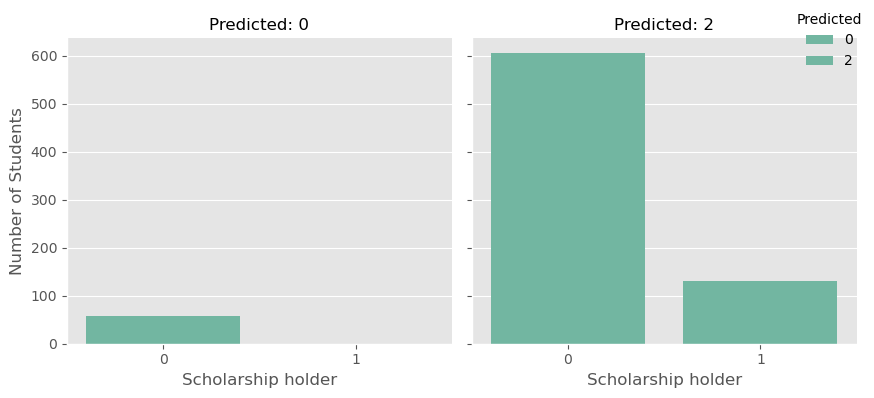

In [83]:
features_per_row = 2
num_rows = (len(enrol_features) + features_per_row - 1) // features_per_row
custom_palette = ["#66c2a5", "#fc8d62"]  # You can adjust these colors as needed
g = sns.FacetGrid(enrol, col='Predicted', height=4, col_wrap=2)
g.map_dataframe(sns.countplot, x=enrol_features[0], hue='Predicted', palette=custom_palette, dodge=False)
g.set_axis_labels("Marital Status", "Number of Students")
g.set_titles(col_template="Predicted: {col_name}")
g.add_legend(title='Predicted', loc='upper right')
for i in range(1, len(enrol_features)):
    g = sns.FacetGrid(enrol, col='Predicted', height=4, col_wrap=2)
    g.map_dataframe(sns.countplot, x=enrol_features[i], hue='Predicted', palette=custom_palette, dodge=False)
    g.set_axis_labels(enrol_features[i], "Number of Students")
    g.set_titles(col_template="Predicted: {col_name}")
    g.add_legend(title='Predicted', loc='upper right')
plt.tight_layout()
plt.show()
